
K Nearest Neighbors:
1 ==> [1.8 3.5]
2 ==> [2.9 2.5]
3 ==> [2.5 4.1]


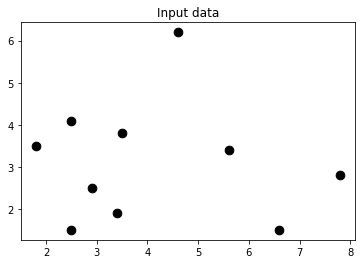

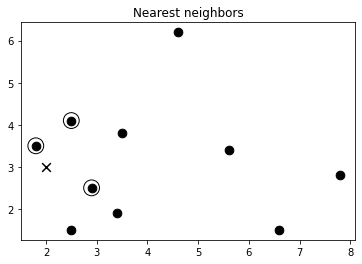

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Input data
X = np.array([[2.5, 1.5],[1.8, 3.5],[2.9, 2.5],
              [7.8, 2.8],[4.6, 6.2],[3.5, 3.8],[2.5, 4.1],
              [3.4, 1.9],[5.6, 3.4],[6.6, 1.5]])

# Number of nearest neighbors
k = 3

# Test datapoint 
test_datapoint = [2.0, 3.0]

# Plot input data 
plt.figure()
plt.title('Input data')
plt.scatter(X[:,0], X[:,1], marker='o', s=75, color='black')

# Build K Nearest Neighbors model
knn_model = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)
distances, indices = knn_model.kneighbors([test_datapoint])

# Print the 'k' nearest neighbors
print("\nK Nearest Neighbors:")
for rank, index in enumerate(indices[0][:k], start=1):
    print(str(rank) + " ==>", X[index])

# Visualize the nearest neighbors along with the test datapoint 
plt.figure()
plt.title('Nearest neighbors')
plt.scatter(X[:, 0], X[:, 1], marker='o', s=75, color='k')
plt.scatter(X[indices][0][:][:, 0], X[indices][0][:][:, 1], marker='o', s=250, color='k', facecolors='none')
plt.scatter(test_datapoint[0], test_datapoint[1],marker='x', s=75, color='k')

plt.show()

Predicted output: [0]


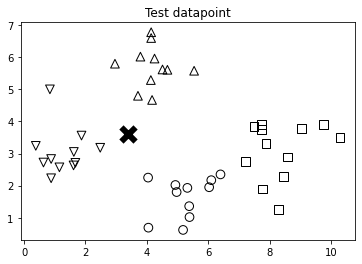

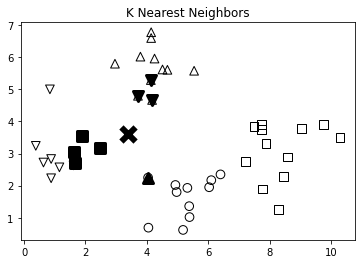

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets
import warnings
warnings.filterwarnings("ignore")

# Load input data
input_file = 'NN_builder_data.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1].astype(np.int)

marker_shapes = 'v^os'
mapper = [marker_shapes[i] for i in y]


# Number of nearest neighbors 
num_neighbors = 8


# Create a K Nearest Neighbours classifier model 
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance')

# Train the K Nearest Neighbours model
classifier.fit(X, y)


# Test input datapoint
test_datapoint = [3.4, 3.6]
plt.figure()
plt.title('Test datapoint')
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i],s=75, edgecolors='black', facecolors='none')

plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', linewidth=6, s=200, facecolors='black')

# Extract the K nearest neighbors
_,indices = classifier.kneighbors([test_datapoint])
indices = indices.astype(np.int)[0]

# Plot k nearest neighbors
plt.figure()
plt.title('K Nearest Neighbors')

for i in indices:
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[y[i]],linewidth=3, s=100, facecolors='black')

plt.scatter(test_datapoint[0], test_datapoint[1], marker='x',linewidth=6, s=200, facecolors='black')

for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i],s=75, edgecolors='black', facecolors='none')

print("Predicted output:", classifier.predict([test_datapoint]))

plt.show()

In [4]:
import json
import numpy as np

In [5]:
def euclidean_score(dataset, user1, user2):
    
    # Movies rated by both user1 and user2
    common_movies = {} 

    for item in dataset[user1]:
        if item in dataset[user2]:
            common_movies[item] = 1

    # If there are no common movies between the users, 
    # then the score is 0 
    if len(common_movies) == 0:
        return 0

    squared_diff = [] 

    for item in dataset[user1]:
        if item in dataset[user2]:
            squared_diff.append(np.square(dataset[user1][item] - dataset[user2][item]))
        
    return 1 / (1 + np.sqrt(np.sum(squared_diff))) 


In [6]:
def pearson_score(dataset, user1, user2):
    
    # Movies rated by both user1 and user2
    common_movies = {}

    for item in dataset[user1]:
        if item in dataset[user2]:
            common_movies[item] = 1

    num_ratings = len(common_movies) 

    # If there are no common movies between user1 and user2, then the score is 0 
    if num_ratings == 0:
        return 0

    # Calculate the sum of ratings of all the common movies 
    user1_sum = np.sum([dataset[user1][item] for item in common_movies])
    user2_sum = np.sum([dataset[user2][item] for item in common_movies])

    # Calculate the sum of squares of ratings of all the common movies 
    user1_squared_sum = np.sum([np.square(dataset[user1][item]) for item in common_movies])
    user2_squared_sum = np.sum([np.square(dataset[user2][item]) for item in common_movies])

    # Calculate the sum of products of the ratings of the common movies
    sum_of_products = np.sum([dataset[user1][item] * dataset[user2][item] for item in common_movies])

    # Calculate the Pearson correlation score
    Sxy = sum_of_products - (user1_sum * user2_sum / num_ratings)
    Sxx = user1_squared_sum - np.square(user1_sum) / num_ratings
    Syy = user2_squared_sum - np.square(user2_sum) / num_ratings
    
    if Sxx * Syy == 0:
        return 0

    return Sxy / np.sqrt(Sxx * Syy)


In [7]:
user1 = 'John Reese'
user2 = 'Harold Finch'
ratings_file = 'imdb_series_rating.json'
with open(ratings_file, 'r') as f:
 data = json.loads(f.read())
print("\nEuclidean score:")
print(euclidean_score(data, user1, user2))


Euclidean score:
0.2204812092115424


In [8]:
user1 = 'Harold Finch'
user2 = 'Joss Carter'
ratings_file = 'imdb_series_rating.json'
with open(ratings_file, 'r') as f:
 data = json.loads(f.read())
print("\nPearson score:")
print(pearson_score(data, user1, user2))


Pearson score:
0.8292682926829268
